Confusion Matrix:
[[ 51960  45318]
 [343257  53486]]

Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.53      0.21     97278
           1       0.54      0.13      0.22    396743

    accuracy                           0.21    494021
   macro avg       0.34      0.33      0.21    494021
weighted avg       0.46      0.21      0.21    494021



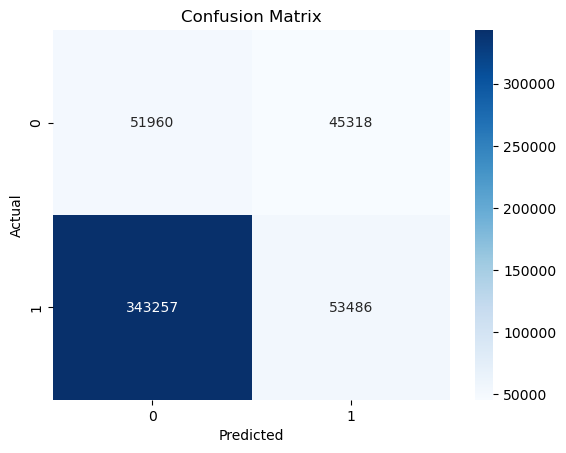

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_kddcup99
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report

kdd = fetch_kddcup99()
cols = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land",
        "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised",
        "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", 
        "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", 
        "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", 
        "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", 
        "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", 
        "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", 
        "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate"]

df = pd.DataFrame(kdd.data, columns=cols)
df['label'] = pd.Series(kdd.target)

for col in ['protocol_type', 'service', 'flag', 'label']:
    df[col] = df[col].str.decode('utf-8')

df['binary_label'] = df['label'].apply(lambda x: 0 if x == 'normal.' else 1)

df = pd.get_dummies(df, columns=['protocol_type', 'service', 'flag'])

X = df.drop(columns=['label', 'binary_label'])
y = df['binary_label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = IsolationForest(contamination=0.2, random_state=42)
model.fit(X_scaled)

y_pred = model.predict(X_scaled)
y_pred = [1 if i == -1 else 0 for i in y_pred]  # Convert -1 to 1 (anomaly), 1 to 0 (normal)

print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))
print("\nClassification Report:")
print(classification_report(y, y_pred))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()